In [51]:
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import make_pipeline
import pandas as pd
from sklearn.feature_selection import SelectFromModel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.construct import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
from sklearn.model_selection import StratifiedKFold
from random import *    
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

df = pd.read_csv("kasMasterNew.csv",sep=';')
#print("data shape: ", df.shape)
#print("data head: ", df.head)

first_column = df.columns[0]
df = df.drop([first_column], axis=1)
feature_labels = df.columns
last = df.iloc[:,-1]
df = df.iloc[:, :-1]

X = df
y = np.ravel(last.to_numpy())


In [52]:
import xgboost
X = df
X = X.to_numpy()

model = list()
features = list()

for x in range(1,2):
    folds = 6
    skf = StratifiedKFold(n_splits=folds, random_state=randint(1, 20000), shuffle=True, )
    skf.get_n_splits(X, y)
    acc_score = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        scale = StandardScaler()
        scaler = scale.fit(X_train)

        X_train_transformed = scaler.transform(X_train)
        X_test_transformed = scaler.transform(X_test)

        selector = SelectFromModel(xgboost.XGBClassifier(min_child_weight= 1, max_depth= 5, learning_rate= 0.2, colsample_bytree = 0.7, n_estimators=800, verbosity = 0), max_features=50, threshold=-np.inf)
        selector.fit(X_train_transformed, y_train)

        X_train_rfc = selector.transform(X_train_transformed)
        X_test_rfc = selector.transform(X_test_transformed)
        
        clf = xgboost.XGBClassifier(min_child_weight= 1, max_depth= 5, learning_rate= 0.2, colsample_bytree = 0.7, n_estimators=800,verbosity = 0)
        clf.fit(X_train_rfc, y_train)
        clf.fit(X_train_rfc, y_train)
        
        y_pred = clf.predict(X_test_rfc)
        
        #print('Accuracy on test set: ')
        print(accuracy_score(y_test, y_pred))
        print(confusion_matrix(y_test,y_pred))
        print(classification_report(y_test,y_pred))
        acc_score.append(accuracy_score(y_test, y_pred))
        
        
        features.append(df.columns[selector.get_support()])
    model.append(acc_score)
    print("Average score:", np.mean(acc_score))
    #model.append(acc_score)             
print("Model:", model)

0.9162303664921466
[[30  0  0  0  0]
 [ 0 10  1  2  0]
 [ 0  3 82  3  1]
 [ 0  1  1 32  0]
 [ 1  1  2  0 21]]
              precision    recall  f1-score   support

       Basal       0.97      1.00      0.98        30
        Her2       0.67      0.77      0.71        13
        LumA       0.95      0.92      0.94        89
        LumB       0.86      0.94      0.90        34
      Normal       0.95      0.84      0.89        25

    accuracy                           0.92       191
   macro avg       0.88      0.89      0.89       191
weighted avg       0.92      0.92      0.92       191

0.9057591623036649
[[30  0  0  0  0]
 [ 0  8  1  4  0]
 [ 0  0 84  3  2]
 [ 0  1  6 27  0]
 [ 0  0  1  0 24]]
              precision    recall  f1-score   support

       Basal       1.00      1.00      1.00        30
        Her2       0.89      0.62      0.73        13
        LumA       0.91      0.94      0.93        89
        LumB       0.79      0.79      0.79        34
      Normal       0

In [45]:
features[4]

Index(['AGR3', 'KRT5', 'TFF3', 'SFRP1', 'MIA', 'KRT15', 'PSAT1', 'LOC145837',
       'CA12', 'MLPH', 'SUSD3', 'D4S234E', 'GATA3', 'DNAI1', 'SEMA3B', 'TSLP',
       'PAMR1', 'NEK2', 'RGMA', 'TBC1D9', 'AURKB', 'CEP55', 'TPX2', 'LMOD1',
       'LIF', 'ERBB2', 'SPRY2', 'PROS1', 'PPARGC1B', 'GPR179', 'HOPX',
       'GPR161', 'SEMA4G', 'EHD2', 'CNRIP1', 'PPAP2B', 'CENPN', 'STAT5A',
       'THSD1', 'RELB', 'TIMELESS', 'LOC100286844', 'MKNK2', 'UBXN2B',
       'CCDC86', 'FBXW7', 'NOP58'],
      dtype='object')

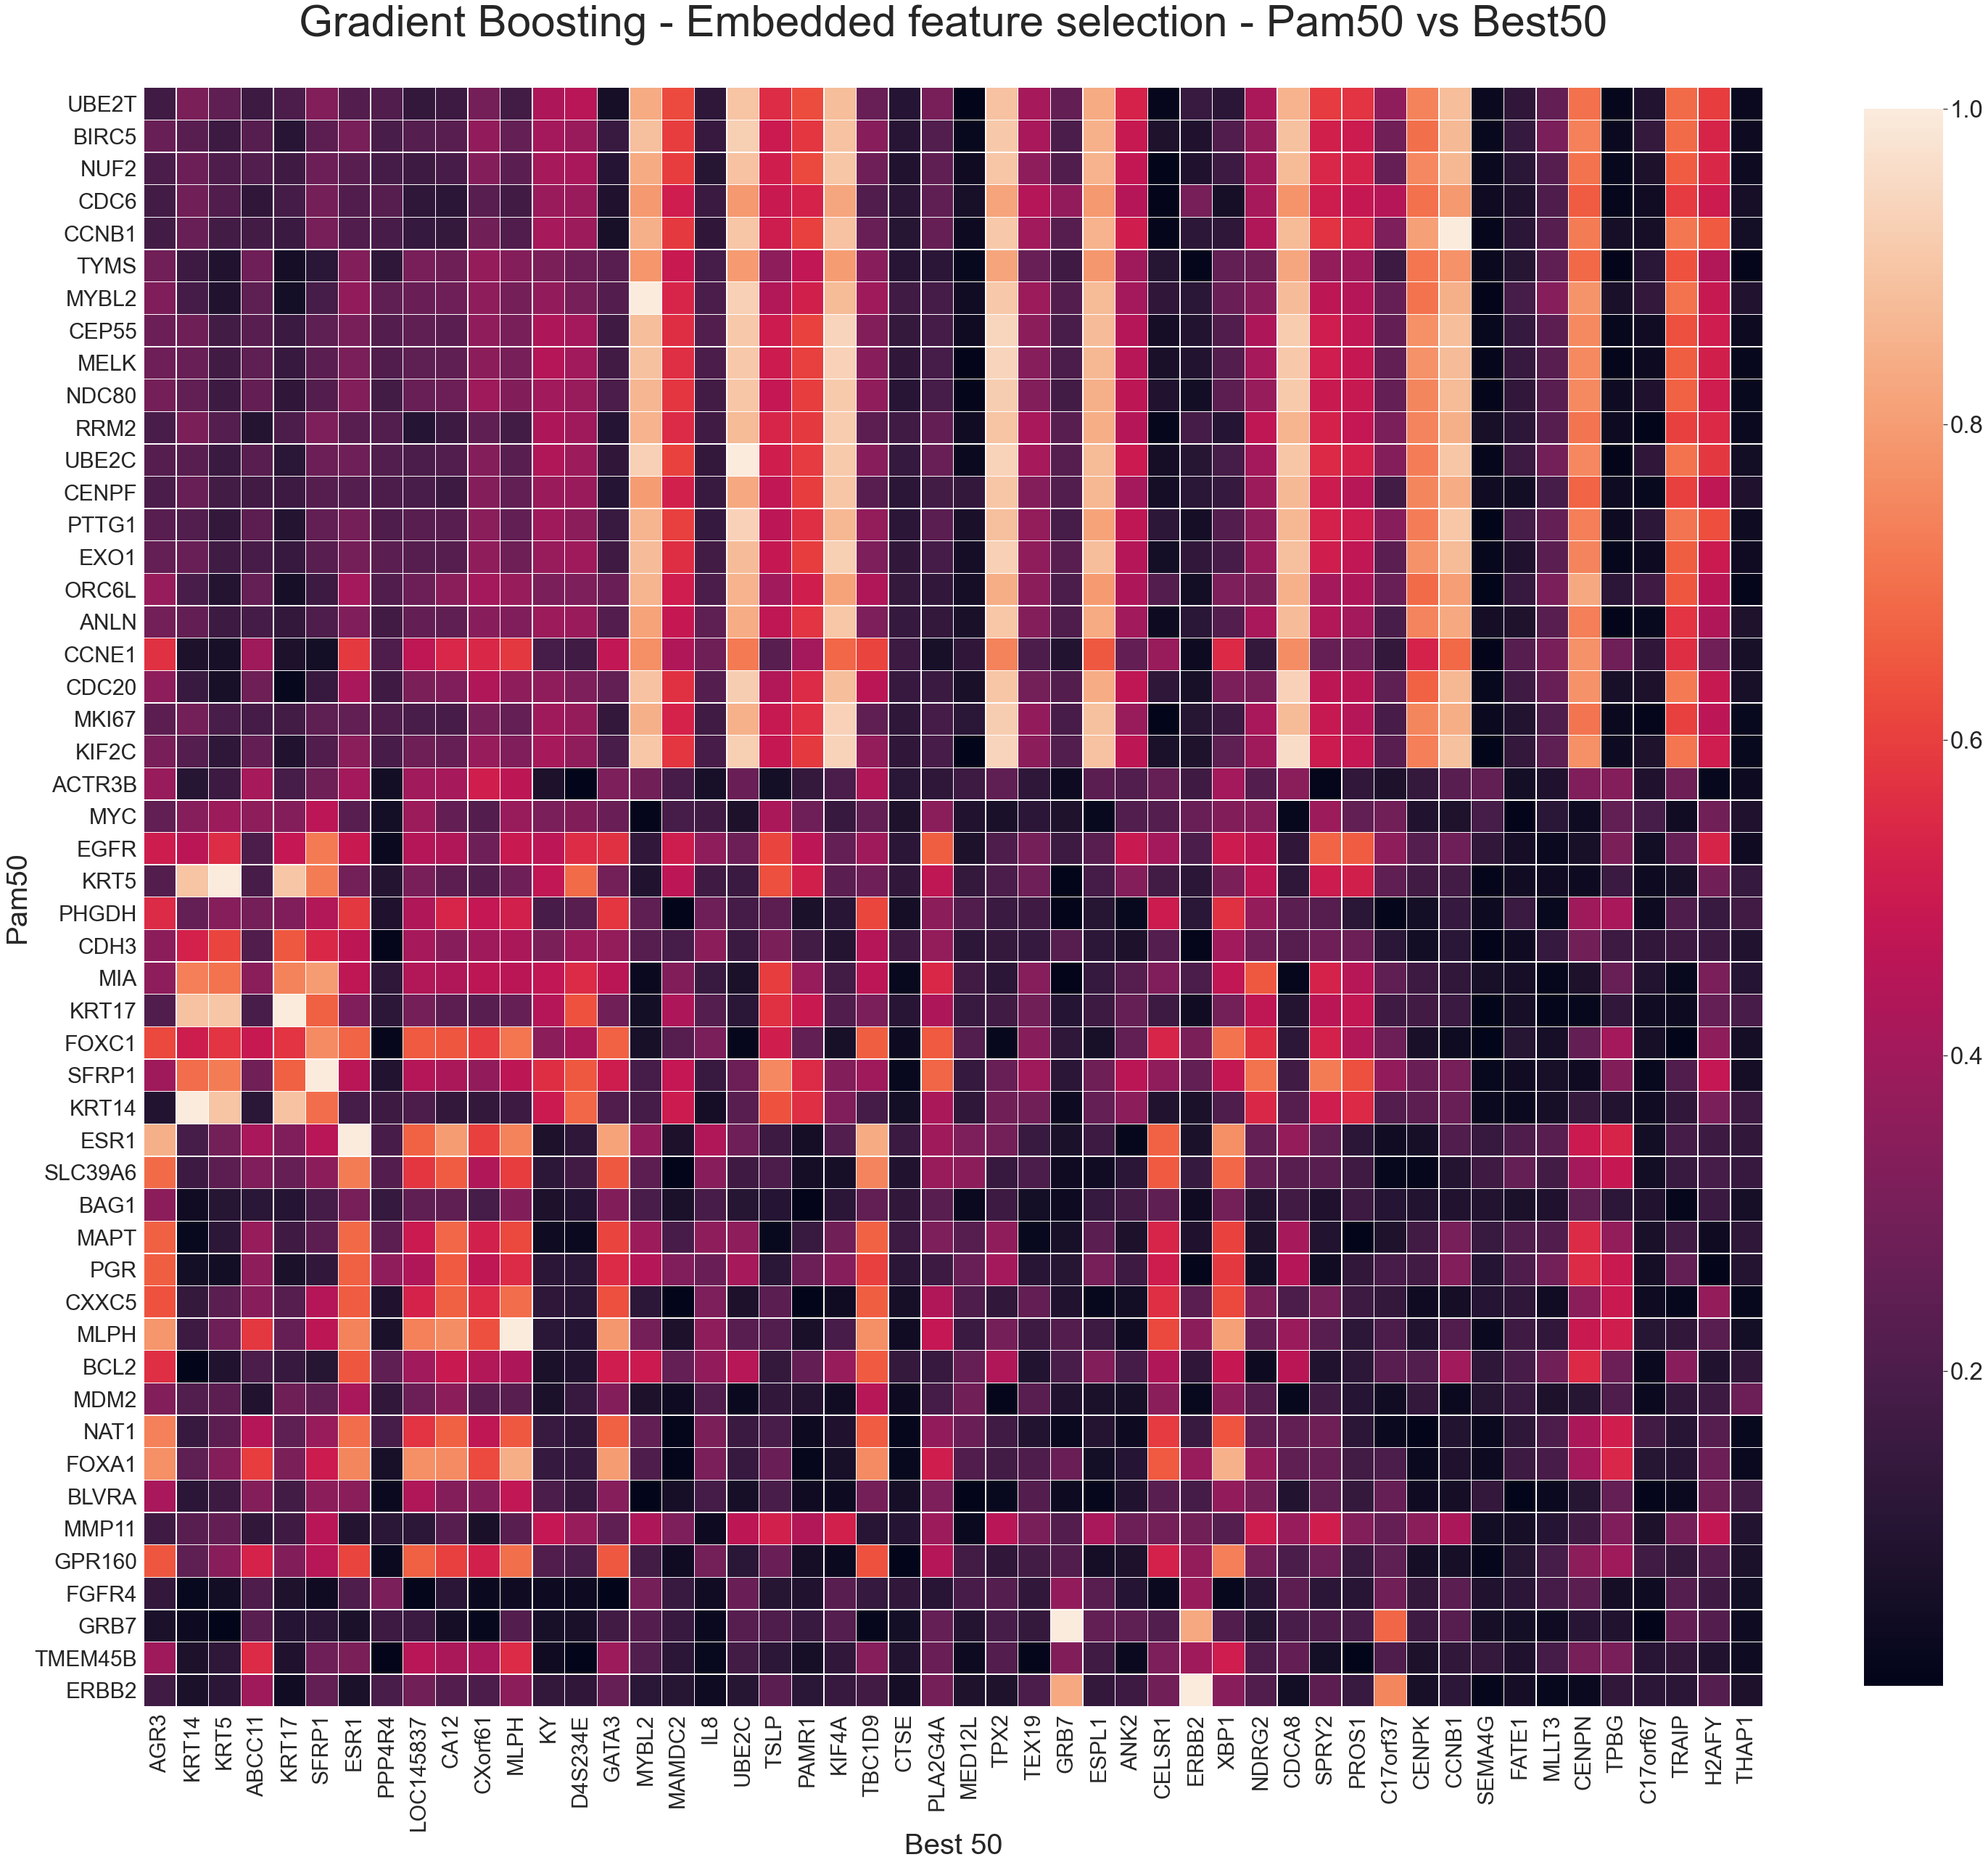

<Figure size 432x288 with 0 Axes>

In [53]:
pam50 = ['UBE2T', 'BIRC5', 'NUF2', 'CDC6', 'CCNB1', 'TYMS', 'MYBL2', 'CEP55',
       'MELK', 'NDC80', 'RRM2', 'UBE2C', 'CENPF', 'PTTG1', 'EXO1', 'ORC6L',
       'ANLN', 'CCNE1', 'CDC20', 'MKI67', 'KIF2C', 'ACTR3B', 'MYC', 'EGFR',
       'KRT5', 'PHGDH', 'CDH3', 'MIA', 'KRT17', 'FOXC1', 'SFRP1', 'KRT14',
       'ESR1', 'SLC39A6', 'BAG1', 'MAPT', 'PGR', 'CXXC5', 'MLPH', 'BCL2',
       'MDM2', 'NAT1', 'FOXA1', 'BLVRA', 'MMP11', 'GPR160', 'FGFR4', 'GRB7',
       'TMEM45B', 'ERBB2']

# not in out data set : ['SR1', 'KNTC2', 'CDCA1'] so deleted from pam 50.



best50 = df[features[4]] # of latest best features
p = df[pam50]

from numpy.random import seed
from scipy.stats import pearsonr

# seed random number generator
seed(1)
# prepare data
#best50 = best50.iloc[:, 0:2]
#p = p.iloc[:, 0:2]
ll = list()
# calculate Pearson's correlation
col = list()
for ind, colum in enumerate(best50.columns):
    #corr, _ = pearsonr(p.columns[ind], column)
    #l.appende(corr)
    for ins, column in enumerate(p.columns):
        #print(colum)
        #print(column)
        #print(p.columns[ind])
        #print(ind)
        #print(best50.columns[ins])
        #print(ins)
        corr, _ = pearsonr(p[column], best50[colum])
        #print(abs(corr))
        col.append(abs(corr))
    ll.append(col)
    col=[] 
#print(l)  

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

fig, ax = plt.subplots(figsize=(50, 50))
#plt.xlabel(best50.columns)
#plt.ylabel(p.columns)

#fig.title('Pearson Absolute Values', fontsize=40)

x_axis_labels = best50.columns.to_numpy() # labels for x-axis
y_axis_labels =  p.columns.to_numpy()# labels for y-axis

# create seabvorn heatmap with required labels
b = sb.heatmap(np.array(ll).T.tolist(),  xticklabels=x_axis_labels, yticklabels=y_axis_labels,
           linewidth=0.4, cbar_kws={"shrink": .8}, fmt=".2f",square=True)
b.axes.set_title("Gradient Boosting - Embedded feature selection - Pam50 vs Best50\n ",fontsize=60)
b.set_xlabel("Best 50",fontsize=40)
b.set_ylabel("Pam50",fontsize=40)
b.tick_params(labelsize=30)
sb.set(font_scale=3)
plt.show()
plt.savefig('Gradient Boosting - Embedded.png',dpi=400)

Model: [[0.8575581395348837, 0.9127906976744186, 0.9331395348837209, 0.9156976744186046, 0.9186046511627907], [0.9156976744186046, 0.9011627906976745, 0.9215116279069767, 0.9069767441860465, 0.9215116279069767], [0.9098837209302325, 0.9040697674418605, 0.8895348837209303, 0.877906976744186, 0.9215116279069767], [0.8953488372093024, 0.9040697674418605, 0.8808139534883721, 0.9302325581395349, 0.9127906976744186], [0.8924418604651163, 0.8982558139534884, 0.8895348837209303, 0.9215116279069767, 0.9127906976744186], [0.9040697674418605, 0.9040697674418605, 0.9244186046511628, 0.9244186046511628, 0.9011627906976745], [0.8866279069767442, 0.8866279069767442, 0.9331395348837209, 0.9127906976744186, 0.8895348837209303], [0.9040697674418605, 0.9098837209302325, 0.9069767441860465, 0.9127906976744186, 0.872093023255814], [0.9331395348837209, 0.9127906976744186, 0.8895348837209303, 0.9069767441860465, 0.9244186046511628], [0.8895348837209303, 0.9215116279069767, 0.9011627906976745, 0.8953488372093

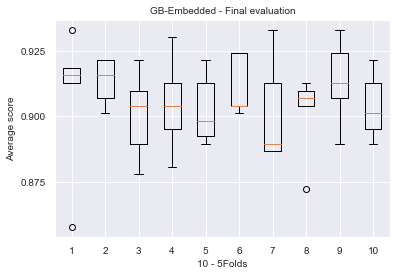

In [57]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

model = list()


for x in range(1,11):

    acc_score = []

    X_t=df[features[4]].to_numpy()

    clf = make_pipeline(StandardScaler(), SVC(kernel="linear", C = 0.1,decision_function_shape='ovo', class_weight = None))
    cv = ShuffleSplit(n_splits=5, test_size=0.3)
    model.append(cross_val_score(clf, X_t, y, cv=cv).tolist())
    #print("Average score:", np.mean(acc_score))
    #model.append(acc_score)             

print("Model:", model)
print("Model average :", np.mean(model))
plt.boxplot(model)
plt.title('GB-Embedded - Final evaluation',fontsize=10)
plt.xlabel('10 - 5Folds',fontsize=10)
plt.ylabel('Average score',fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig("GBFinalevaluation.png",dpi=500)
plt.show()

In [50]:
np.mean([[0.8733624454148472, 0.9039301310043668, 0.9301310043668122, 0.9170305676855895, 0.9210526315789473], [0.9126637554585153, 0.9301310043668122, 0.9126637554585153, 0.8864628820960698, 0.881578947368421], [0.9082969432314411, 0.9039301310043668, 0.9301310043668122, 0.9213973799126638, 0.9035087719298246], [0.9082969432314411, 0.9082969432314411, 0.9650655021834061, 0.8733624454148472, 0.8947368421052632], [0.8995633187772926, 0.8908296943231441, 0.9039301310043668, 0.925764192139738, 0.8859649122807017], [0.9126637554585153, 0.9170305676855895, 0.925764192139738, 0.9126637554585153, 0.9166666666666666], [0.9126637554585153, 0.9170305676855895, 0.8951965065502183, 0.9126637554585153, 0.8903508771929824], [0.8908296943231441, 0.9126637554585153, 0.9082969432314411, 0.9301310043668122, 0.9254385964912281], [0.925764192139738, 0.925764192139738, 0.8951965065502183, 0.9082969432314411, 0.8947368421052632], [0.9126637554585153, 0.9301310043668122, 0.8995633187772926, 0.9126637554585153, 0.9122807017543859]])

0.9097839577108711